# Загрузка данных

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Данные взяты с сайта kaggle
[банковские транзакции](https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation)

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Аналитик_Зерокод/bank_clients_transactions.csv')

In [3]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


# Приведение столбцов к стилю camel_case

Приведение столбцов к стилю `camelCase` означает изменение имен столбцов в датафрейме (или любой другой структуре данных) так, чтобы они соответствовали стилю именования `camelCase`. Стиль `camelCase` предполагает, что первое слово начинается с маленькой буквы, а каждое последующее слово начинается с заглавной буквы, без использования пробелов или символов подчеркивания.

In [5]:
# Функция для преобразования в camelCase
def to_camel_case(snake_str):
    components = snake_str.replace(' (INR)', '').split('_')
    return components[0].lower() + ''.join(x.title() for x in components[1:])

In [6]:
# Применение функции к именам столбцов
df.columns = [to_camel_case(col) for col in df.columns]
df

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


# Приведение типов данных

In [7]:
#привести дату к типу datetime


In [8]:
# Преобразуем даты
df['customerdob'] = pd.to_datetime(df['customerdob'], format='%d/%m/%y', errors='coerce', dayfirst=True)
df['transactiondate'] = pd.to_datetime(df['transactiondate'], format='%d/%m/%y', dayfirst=True)
df

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0


In [9]:
# Исправляем интерпретацию годов
df.loc[df['customerdob'] > pd.Timestamp('today'), 'customerdob'] -= pd.DateOffset(years=100)
df

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0


In [10]:
# Сортируем
df_sorted = df.sort_values(by='customerdob', ascending=True)
df_sorted

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount
634545,T634546,C3922921,1925-05-06,F,TRIVANDRUM,604463.50,2016-08-29,114645,979.00
832126,T832127,C2918474,1926-01-28,M,MUMBAI,211265.52,2016-09-04,120601,41751.00
297246,T297247,C8714850,1926-03-14,M,GHAZIABAD,781137.69,2016-08-11,234423,26832.00
694258,T694259,C6522147,1926-11-06,M,SOLAN,254528.76,2016-08-31,194047,1930.00
657789,T657790,C1722115,1926-11-06,M,SOLAN,254528.76,2016-08-31,194142,235.00
...,...,...,...,...,...,...,...,...,...
1048452,T1048453,C3813481,NaT,M,NEW DELHI,984605.24,2016-09-18,84644,219.00
1048472,T1048473,C1242585,NaT,M,NEW DELHI,1290777.41,2016-09-18,175303,8921.00
1048531,T1048532,C6937679,NaT,M,NEW DELHI,50698.90,2016-09-18,184319,598.86
1048533,T1048534,C7431884,NaT,M,MANDIR DHANBAD,53771.64,2016-09-18,184049,520.00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   transactionid       1048567 non-null  object        
 1   customerid          1048567 non-null  object        
 2   customerdob         987831 non-null   datetime64[ns]
 3   custgender          1047467 non-null  object        
 4   custlocation        1048416 non-null  object        
 5   custaccountbalance  1046198 non-null  float64       
 6   transactiondate     1048567 non-null  datetime64[ns]
 7   transactiontime     1048567 non-null  int64         
 8   transactionamount   1048567 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 72.0+ MB


# Поиск дублей и пропусков в данных

In [12]:
df.columns

Index(['transactionid', 'customerid', 'customerdob', 'custgender',
       'custlocation', 'custaccountbalance', 'transactiondate',
       'transactiontime', 'transactionamount'],
      dtype='object')

In [13]:
# Поиск пропущенных данных
#df.isna().sum()
missing_data = df.isnull().sum()
print("\nКоличество пропущенных данных в каждом столбце:")
print(missing_data)


Количество пропущенных данных в каждом столбце:
transactionid             0
customerid                0
customerdob           60736
custgender             1100
custlocation            151
custaccountbalance     2369
transactiondate           0
transactiontime           0
transactionamount         0
dtype: int64


In [14]:
#Отфильтровать те записи таблицы, в которых есть пропуски.
df.query('customerdob.isna() == True')

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount
16,T17,C1376215,NaT,M,MUMBAI,77495.15,2016-08-01,124727,1423.11
22,T23,C7018081,NaT,M,WAYS PANCHKUVA AHMEDABAD,143.07,2016-08-03,104718,110.00
28,T29,C7935438,NaT,M,MOHALI,969436.12,2016-08-03,183634,36.90
35,T36,C1211387,NaT,M,AHMEDABAD,11791.25,2016-08-03,125915,1075.00
151,T152,C3334638,NaT,M,PUNE,700.00,2016-08-09,24912,1500.00
...,...,...,...,...,...,...,...,...,...
1048452,T1048453,C3813481,NaT,M,NEW DELHI,984605.24,2016-09-18,84644,219.00
1048472,T1048473,C1242585,NaT,M,NEW DELHI,1290777.41,2016-09-18,175303,8921.00
1048531,T1048532,C6937679,NaT,M,NEW DELHI,50698.90,2016-09-18,184319,598.86
1048533,T1048534,C7431884,NaT,M,MANDIR DHANBAD,53771.64,2016-09-18,184049,520.00


In [15]:
#удалим строки с пропусками
df_1 = df.dropna(subset=['customerdob', 'custgender', 'custlocation', 'custaccountbalance'])
df_1.isna().sum()

,0
transactionid,0
customerid,0
customerdob,0
custgender,0
custlocation,0
custaccountbalance,0
transactiondate,0
transactiontime,0
transactionamount,0


In [16]:
# Поиск дубликатов. Посчитаем количечтво дубликатов
df_1.duplicated().sum()
#удаление явных дубликатов
#df_2 = df_1.drop_duplicates()

0

# Исследовательский анализ данных

In [17]:
df_1

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0


In [18]:
# После очистки общее количество данных уменшилось на 6 %
1-(985322/1048567)

0.06031564983448845

In [19]:
# сколько уникальных клиентов?

In [20]:
unique_customers_count = df_1['customerid'].nunique()
print(f"Количество уникальных клиентов: {unique_customers_count}")

Количество уникальных клиентов: 839081


In [21]:
# какое количество транзакций было совершено?

In [22]:
transaction_count = df_1['transactionid'].count()
print(f"Количество транзакций: {transaction_count}")

Количество транзакций: 985322


In [23]:
# сколько в среднем транзакций приходится на одного клиента?

In [24]:
print(f"В среднем на одного клиента приходится: {df_1['transactionid'].count()/df_1['customerid'].nunique():.2f}  транзакций ")

В среднем на одного клиента приходится: 1.17  транзакций 


In [25]:
# Группировка по customerid и подсчет количества транзакций на клиента
transactions_per_customer = df_1.groupby('customerid')['transactionid'].count()
# Среднее количество транзакций на клиента
average_transactions = transactions_per_customer.mean()
print(f"Среднее количество транзакций на одного клиента: {average_transactions:.2f}")

Среднее количество транзакций на одного клиента: 1.17


In [26]:
# изучить распределение и размах величин CustAccountBalance и TransactionAmount (ящик с усами и гистограмма/скрипичный ключ)
import matplotlib.pyplot as plt

count    9.853220e+05
mean     1.060612e+05
std      8.179054e+05
min      0.000000e+00
25%      4.582132e+03
50%      1.600630e+04
75%      5.375908e+04
max      1.150355e+08
Name: custaccountbalance, dtype: float64


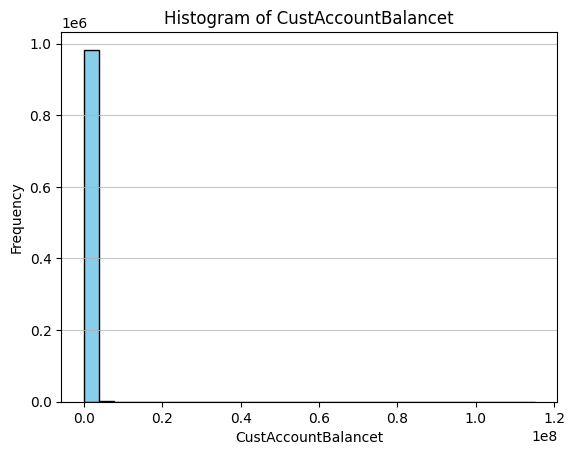

In [27]:
# Изучение распределения значений в столбце CustAccountBalancet
print(df_1['custaccountbalance'].describe())

# Построение гистограммы
plt.hist(df_1['custaccountbalance'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of CustAccountBalancet')
plt.xlabel('CustAccountBalancet')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

Вывод: Значения баланса клиентов распределены не равномерно, имеются сильные выбросы

count    9.853220e+05
mean     1.452425e+03
std      6.139765e+03
min      0.000000e+00
25%      1.510000e+02
50%      4.310000e+02
75%      1.125000e+03
max      1.560035e+06
Name: transactionamount, dtype: float64


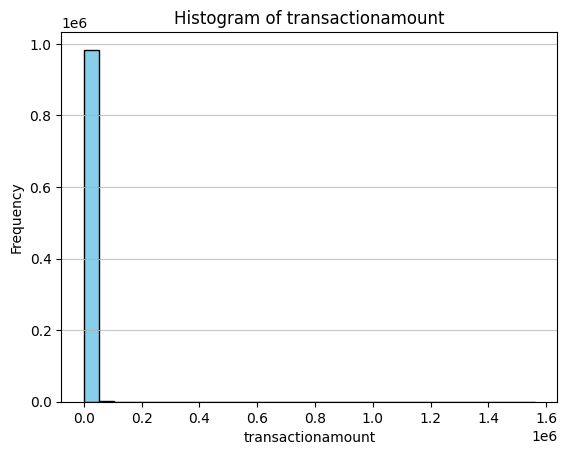

In [28]:
# Изучение распределения значений в столбце CustAccountBalancet
print(df_1['transactionamount'].describe())

# Построение гистограммы
plt.hist(df_1['transactionamount'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of transactionamount')
plt.xlabel('transactionamount')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

Вывод: Значения распределены не равномерно, имеются сильные выбросы

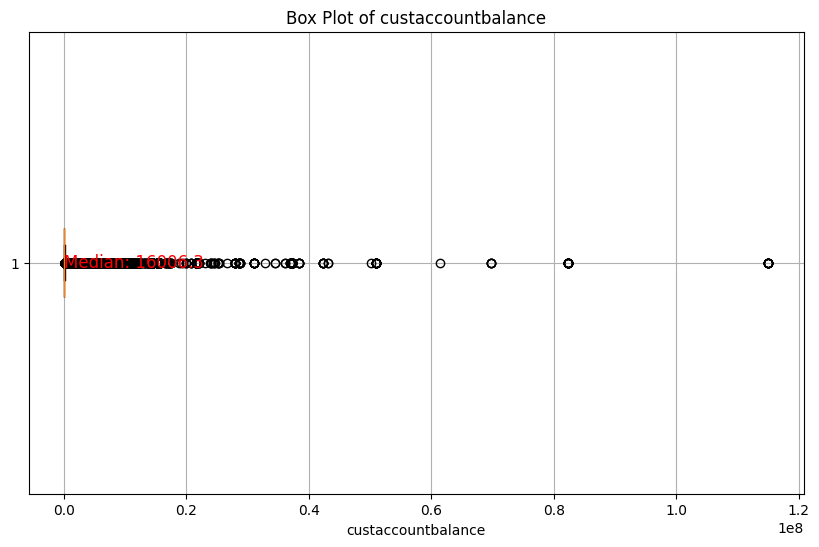

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Построение ящика с усами для custaccountbalance
plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(df_1['custaccountbalance'], vert=False, patch_artist=True)
# Подпись второго квартиля (медианы)
median = df_1['custaccountbalance'].median()
plt.text(median, 1, f'Median: {median}', verticalalignment='center', fontsize=12, color='red')
plt.title('Box Plot of custaccountbalance')
plt.xlabel('custaccountbalance')
plt.grid(True)
plt.show()

Вывод: Значения transactionamount распределены не равномерно, имеются сильные выбросы

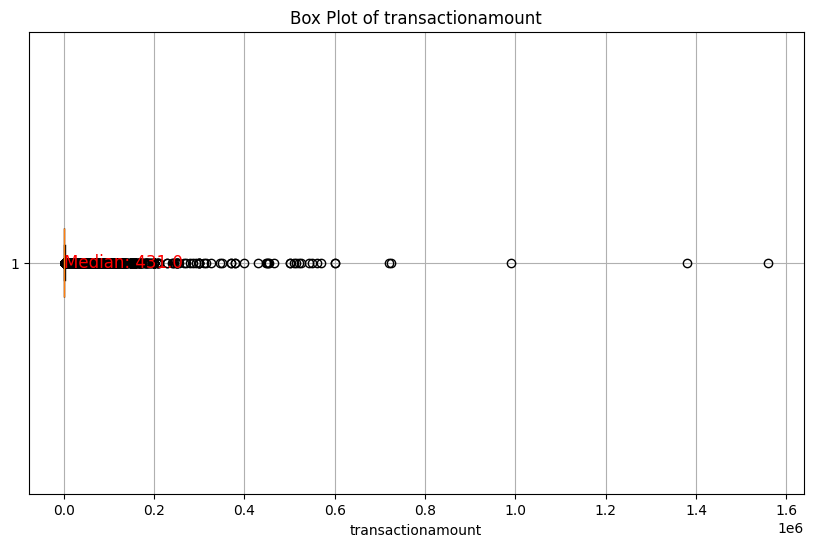

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Построение ящика с усами для purchase_amount
plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(df_1['transactionamount'], vert=False, patch_artist=True)
# Подпись второго квартиля (медианы)
median = df_1['transactionamount'].median()
plt.text(median, 1, f'Median: {median}', verticalalignment='center', fontsize=12, color='red')
plt.title('Box Plot of transactionamount')
plt.xlabel('transactionamount')
plt.grid(True)
plt.show()

Вывод: Значения распределены не равномерно, имеются сильные выбросы

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

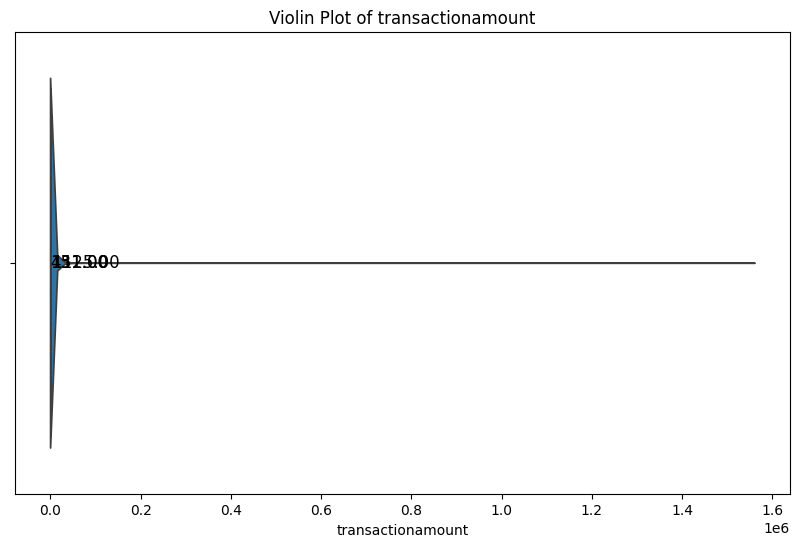

In [32]:
# Построение скрипичного графика для transactionamount
plt.figure(figsize=(10, 6))
sns.violinplot(x=df_1['transactionamount'], inner="quartile")
# Подпись значений
quartiles = df_1['transactionamount'].quantile([0.25, 0.5, 0.75]).values
for q in quartiles:
    plt.text(q, 0, f'{q:.2f}', verticalalignment='center', fontsize=12, color='black')
plt.title('Violin Plot of transactionamount')
plt.xlabel('transactionamount')
plt.grid(False)
plt.show()

Вывод: Значения распределены не равномерно, имеются сильные выбросы

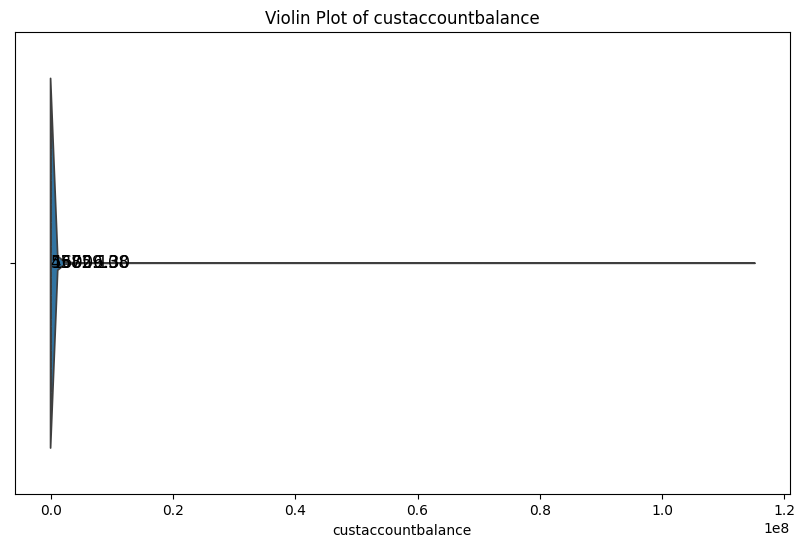

In [33]:
# Построение скрипичного графика для custaccountbalance
plt.figure(figsize=(10, 6))
sns.violinplot(x=df_1['custaccountbalance'], inner="quartile")
# Подпись значений
quartiles = df_1['custaccountbalance'].quantile([0.25, 0.5, 0.75]).values
for q in quartiles:
    plt.text(q, 0, f'{q:.2f}', verticalalignment='center', fontsize=12, color='black')
plt.title('Violin Plot of custaccountbalance')
plt.xlabel('custaccountbalance')
plt.grid(False)
plt.show()

Вывод: Значения распределены не равномерно, имеются сильные выбросы

In [34]:
# изучить возраст клиентов (визуализировать)
import matplotlib.pyplot as plt

In [35]:
# Функция для вычисления возраста
def calculate_age(birth_date, transaction_date):
    return transaction_date.year - birth_date.year - ((transaction_date.month, transaction_date.day) < (birth_date.month, birth_date.day))

In [36]:
# Применение функции для вычисления возраста на день транзакции
df_1['customer_age'] = df_1.apply(lambda row: calculate_age(row['customerdob'], row['transactiondate']), axis=1)

# Вывод описательной статистики по возрасту
print(df_1['customer_age'].describe())

count    985322.000000
mean         30.685918
std           8.758058
min          -8.000000
25%          25.000000
50%          28.000000
75%          34.000000
max          91.000000
Name: customer_age, dtype: float64


<ipython-input-36-7d979bb69372>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['customer_age'] = df_1.apply(lambda row: calculate_age(row['customerdob'], row['transactiondate']), axis=1)


Вывод: средний возраст клиентов - 30 лет, самый пожилой клиент - в возрасте 91 год

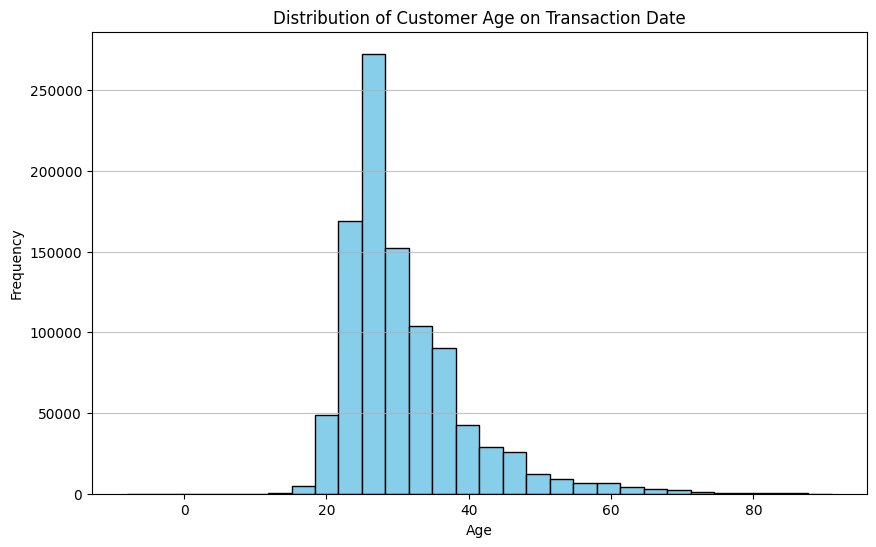

In [37]:
# Построение столбчатой диаграммы распределения возраста
plt.figure(figsize=(10, 6))
df_1['customer_age'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Age on Transaction Date')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

Вывод: больше всего клиентов в возрасте от 20 до 40 лет

In [67]:
# Группируем данные по возрасту и подсчитываем количество уникальных клиентов для каждого возраста
age_distribution = df_1.groupby('customer_age')['customerid'].nunique()


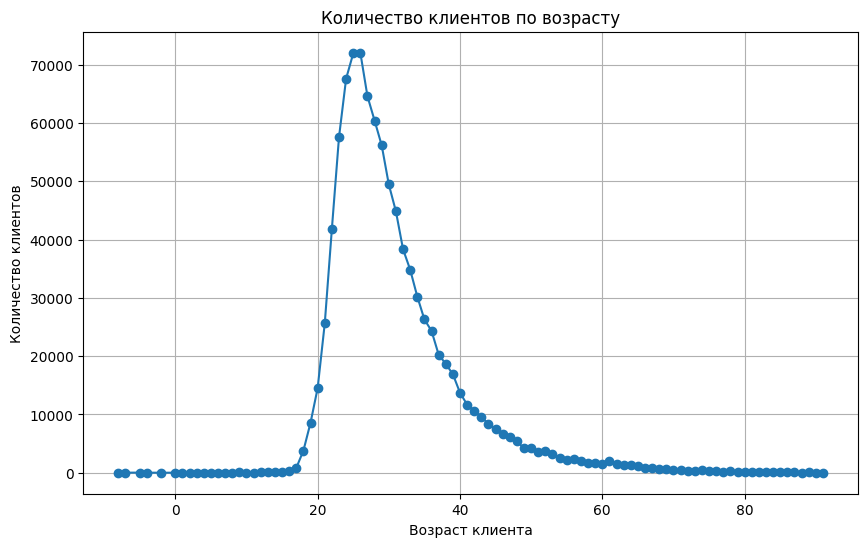

In [39]:
# Переходим к построению графика
plt.figure(figsize=(10, 6))
plt.plot(age_distribution.index, age_distribution.values, marker='o', linestyle='-')
plt.title('Количество клиентов по возрасту')
plt.xlabel('Возраст клиента')
plt.ylabel('Количество клиентов')
plt.grid(True)
plt.show()

Вывод: больше всего клиентов в возрасте от 20 до 40 лет

In [40]:
# изучить пол клиентов (визуализировать)

In [41]:
# Подсчет количества мужчин и женщин
gender_counts = df_1['custgender'].value_counts()
gender_counts

,count
custgender,
M,712454
F,272868


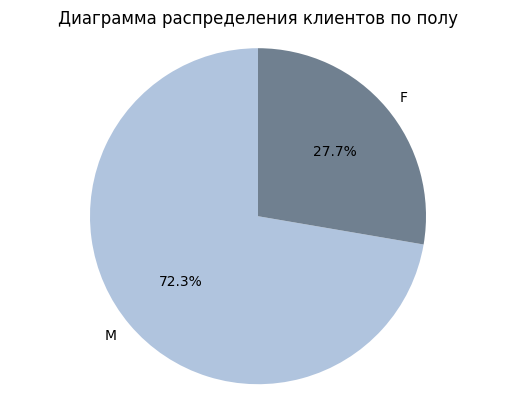

In [42]:
import matplotlib.pyplot as plt
# Построение круговой диаграммы
colors = ['#B0C4DE', '#708090']  # Светло-голубой и серый цвет
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Диаграмма распределения клиентов по полу')
plt.axis('equal')  # Убедиться, что круговая диаграмма круглая
plt.show()

Вывод: количество мужчин значительно больше количества жанщин

In [43]:
# изучить место жительства клиентов (визуализировать)

In [44]:
# Группируем данные по городу и подсчитываем количество уникальных клиентов для каждого города
city_customer_count = df_1.groupby('custlocation')['customerid'].nunique()
# Сортируем результаты по убыванию и берем топ 15 городов
top_15_cities = city_customer_count.sort_values(ascending=False).head(15)
top_15_cities

,customerid
custlocation,
MUMBAI,96037
BANGALORE,76645
NEW DELHI,75293
GURGAON,69622
DELHI,66486
NOIDA,31472
CHENNAI,27352
PUNE,24370
HYDERABAD,21712


In [45]:
# Сортируем результаты по возрастанию и берем топ 5 городов
top_5_cities = city_customer_count.sort_values(ascending=True).head(5)
top_5_cities

,customerid
custlocation,
ZUNHEBOTO,1
DIST BHOPAL,1
PAVRIGARWAL,1
DIST AURANGABAD,1
DIST AMRITSAR AMRITSAR,1


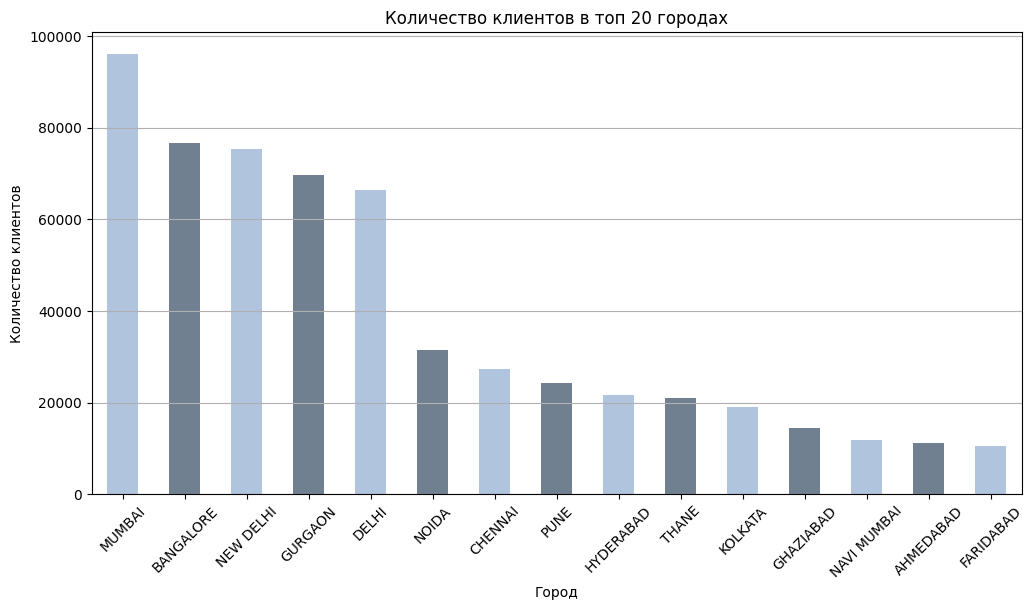

In [68]:
# Переходим к построению столбчатой диаграммы
plt.figure(figsize=(12, 6))
top_15_cities.plot(kind='bar', color=colors)  # Добавляем параметр color для определения цветов
plt.title('Количество клиентов в топ 20 городах')
plt.xlabel('Город')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Вывод: на первом месте по количеству клиентов - MUMBAI на втором - BANGALORE, на третьем - NEW DELHI

In [47]:
# посмотреть динамику транзакций по дате (в кол-ве TransactionID) - линейный график

In [48]:
# Группируем данные по дате транзакции и подсчитываем количество транзакций
transactions_by_date = df_1.groupby('transactiondate')['transactionid'].count()
transactions_by_date

,transactionid
transactiondate,
2016-08-01,19213
2016-08-02,19631
2016-08-03,19274
2016-08-04,19428
2016-08-05,19890
2016-08-06,25267
2016-08-07,26022
2016-08-08,19647
2016-08-09,20489


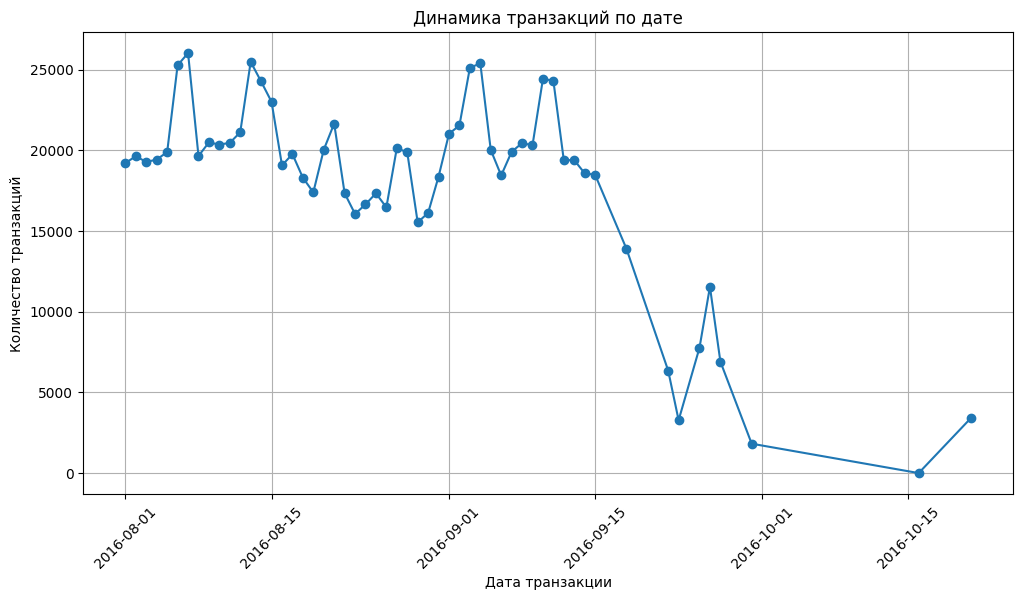

In [71]:
# Переходим к построению линейного графика
plt.figure(figsize=(12, 6))
plt.plot(transactions_by_date.index, transactions_by_date.values, marker='o', linestyle='-')
plt.title('Динамика транзакций по дате')
plt.xlabel('Дата транзакции')
plt.ylabel('Количество транзакций')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Вывод; с 2016-08-01 по 2016-09-01 количество транзакций в среднем стабильое с небольшими скачками. После 2016-09-15 произошло резкое сокрашение количества транзакий

In [50]:
# посмотреть динамику транзакций по дате (в сумме TransactionAmount)

In [51]:
# Группируем данные по дате транзакции и подсчитываем платежей
transactionamount_by_date = df_1.groupby('transactiondate')['transactionamount'].sum()
transactionamount_by_date

,transactionamount
transactiondate,
2016-08-01,26001637.35
2016-08-02,26669859.07
2016-08-03,26762592.11
2016-08-04,30912733.49
2016-08-05,30628121.26
2016-08-06,42429271.14
2016-08-07,40070110.27
2016-08-08,25856765.43
2016-08-09,28696601.40


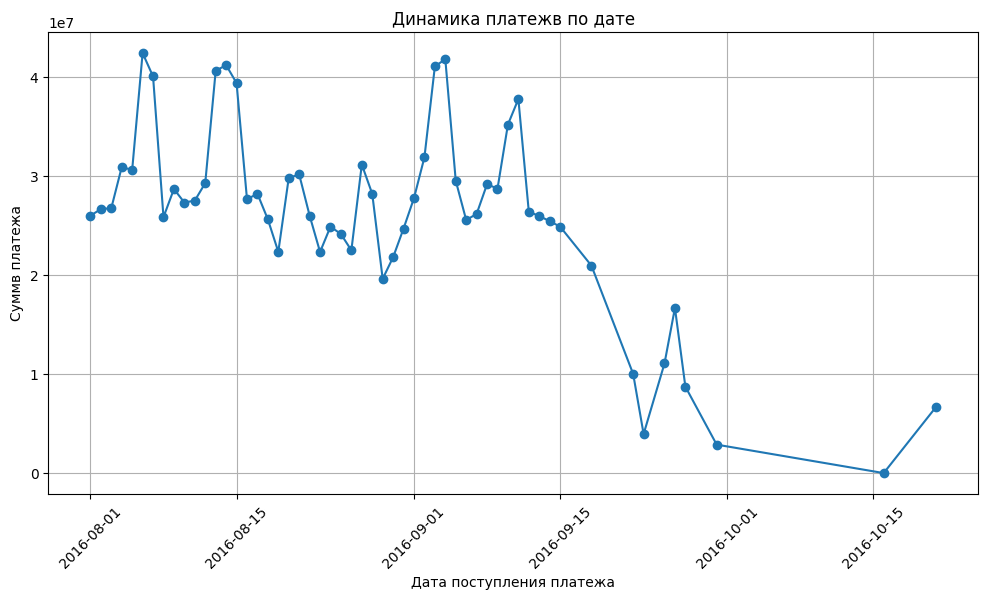

In [52]:
# Переходим к построению линейного графика
plt.figure(figsize=(12, 6))
plt.plot(transactionamount_by_date.index, transactionamount_by_date.values, marker='o', linestyle='-')
plt.title('Динамика платежв по дате')
plt.xlabel('Дата поступления платежа')
plt.ylabel('Суммв платежа')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Вывод; с 2016-08-01 по 2016-09-01 сумма платежей в среднем стабильое с небольшими скачками. После 2016-09-15 произошло резкое сокрашение количества транзакий

In [53]:
# разбить клиентов на корзины по возрасту и определить самую платежеспособную группу

In [54]:
# Создаем возрастные группы
bins = [0, 20, 30, 40, 50, float('inf')]
labels = ['До 20 лет', 'От 20 до 30 лет', 'От 30 до 40 лет', 'От 40 до 50 лет', 'Старше 50 лет']

# Добавляем новый столбец с возрастными группами
df_1['age_group'] = pd.cut(df_1['customer_age'], bins=bins, labels=labels, right=False)
df_1

<ipython-input-54-be73d67b6da6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['age_group'] = pd.cut(df_1['customer_age'], bins=bins, labels=labels, right=False)


,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount,customer_age,age_group
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22,От 20 до 30 лет
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59,Старше 50 лет
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,19,До 20 лет
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,42,От 40 до 50 лет
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28,От 20 до 30 лет
...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,26,От 20 до 30 лет
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,24,От 20 до 30 лет
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,27,От 20 до 30 лет
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,38,От 30 до 40 лет


In [55]:
# Группируем по возрастным корзинам и суммируем transactionamount
age_group_summary = df_1.groupby('age_group')['transactionamount'].sum()
age_group_summary

<ipython-input-55-ca4ddc1a8076>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_summary = df_1.groupby('age_group')['transactionamount'].sum()


,transactionamount
age_group,
До 20 лет,1.407709e+07
От 20 до 30 лет,5.489439e+08
От 30 до 40 лет,5.082273e+08
От 40 до 50 лет,2.218939e+08
Старше 50 лет,1.378640e+08


In [56]:
# Находим самую платежеспособную группу
most_valuable_group = age_group_summary.idxmax()
max_value = age_group_summary.max()

print(f'Самая платежеспособная группа: {most_valuable_group} с общей суммой транзакций {max_value}')

Самая платежеспособная группа: От 20 до 30 лет с общей суммой транзакций 548943853.53


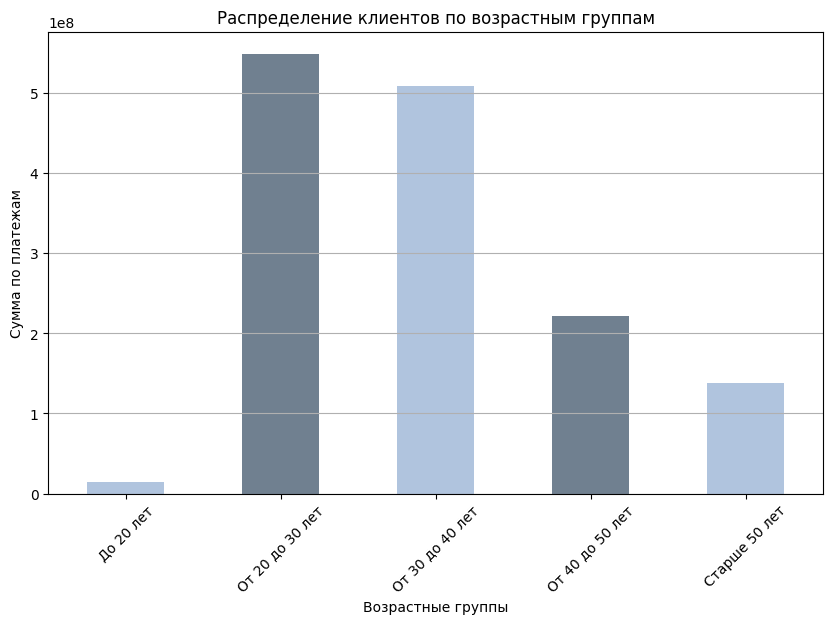

In [73]:
# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
age_group_summary.plot(kind='bar', color=colors)
plt.title('Распределение клиентов по возрастным группам')
plt.xlabel('Возрастные группы')
plt.ylabel('Сумма по платежам')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Показать график
plt.show()

Вывод: Самая платежемпасобная группа это клиенты в возрасте от 20 до 30 лет, сразу за ними по платежеспособности идут клиенты 30-40 лет

In [58]:
# посмотреть распредление транзакций по локации – вывести топ 10 по кол-ву транзакций/сумме транзакций

In [59]:
# Подсчитываем количество транзакций по каждой локации
location_transaction_counts = df_1['custlocation'].value_counts().nlargest(10)
location_transaction_counts

,count
custlocation,
MUMBAI,97679
BANGALORE,77751
NEW DELHI,76380
GURGAON,70518
DELHI,67335
NOIDA,31675
CHENNAI,27500
PUNE,24493
HYDERABAD,21819


In [60]:
# Подсчитываем сумму транзакций по каждой локации
location_transaction_sums = df_1.groupby('custlocation')['transactionamount'].sum().nlargest(10)
location_transaction_sums

,transactionamount
custlocation,
MUMBAI,1.616925e+08
NEW DELHI,1.305968e+08
BANGALORE,1.054833e+08
GURGAON,1.011668e+08
DELHI,9.302718e+07
NOIDA,4.189667e+07
KOLKATA,4.072906e+07
CHENNAI,3.824579e+07
PUNE,3.496158e+07


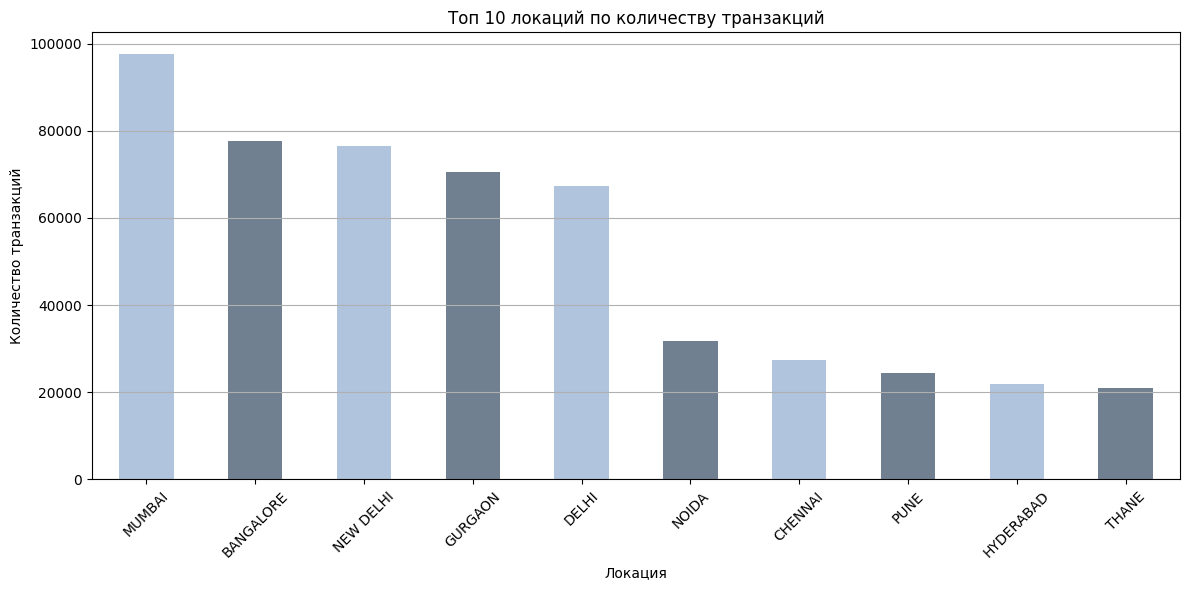

In [74]:
# Построение столбчатой диаграммы для количества транзакций
plt.figure(figsize=(12, 6))
location_transaction_counts.plot(kind='bar', color=colors)
plt.title('Топ 10 локаций по количеству транзакций')
plt.xlabel('Локация')
plt.ylabel('Количество транзакций')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()  # Чтобы подстроить элементы на графике
plt.show()

Вывод: на первом месте по количеству транзакций - MUMBAI на втором - BANGALORE, на третьем - NEW DELHI

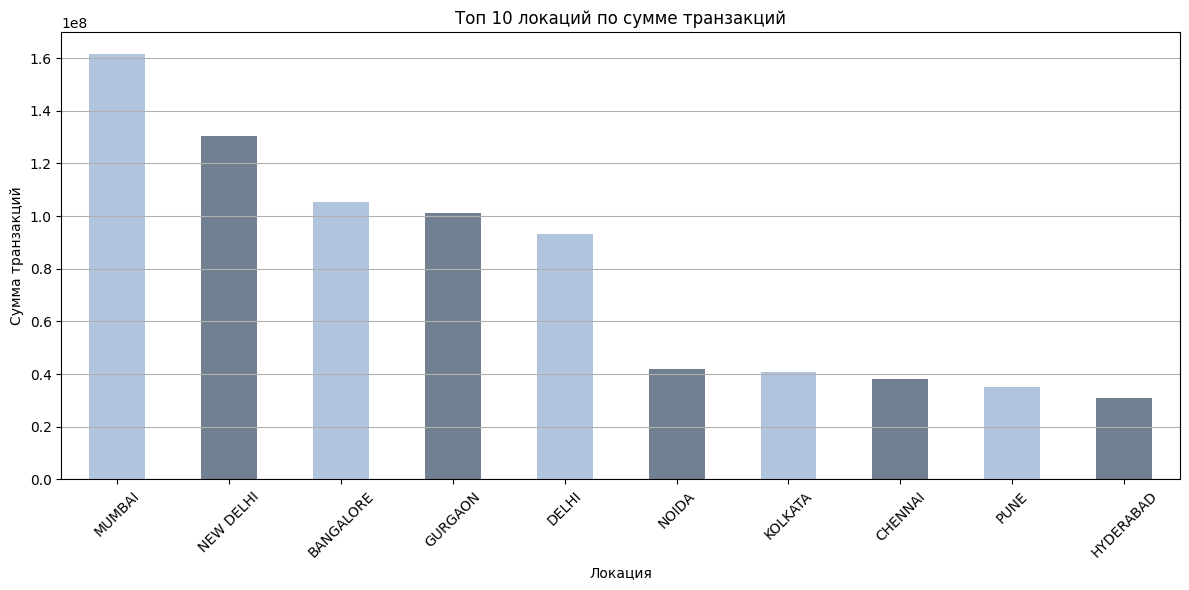

In [75]:
# Построение столбчатой диаграммы для суммы транзакций
plt.figure(figsize=(12, 6))
location_transaction_sums.plot(kind='bar', color=colors)
plt.title('Топ 10 локаций по сумме транзакций')
plt.xlabel('Локация')
plt.ylabel('Сумма транзакций')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()  # Чтобы подстроить элементы на графике
plt.show()

Вывод: на первом месте по сумме переводов - MUMBAI на втором - BANGALORE, на третьем - NEW DELHI

In [63]:
# посмотреть распределение времени транзакции (TransactionTime). Перевести из миллисекунд в минуты

In [64]:
# Преобразуем время транзакции из миллисекунд в минуты
df_1['transactiontime_minutes'] = df_1['transactiontime'] / (1000 * 60)
df_1

<ipython-input-64-1df4d86118a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['transactiontime_minutes'] = df_1['transactiontime'] / (1000 * 60)


,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount,customer_age,age_group,transactiontime_minutes
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22,От 20 до 30 лет,2.386783
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59,Старше 50 лет,2.364300
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,19,До 20 лет,2.378533
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,42,От 40 до 50 лет,2.378567
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28,От 20 до 30 лет,3.019267
...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,26,От 20 до 30 лет,3.080400
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,24,От 20 до 30 лет,3.062233
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,27,От 20 до 30 лет,3.055217
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,38,От 30 до 40 лет,3.078433


count    985322.000000
mean          2.623907
std           0.854511
min           0.000000
25%           2.070700
50%           2.743750
75%           3.335850
max           3.932650
Name: transactiontime_minutes, dtype: float64


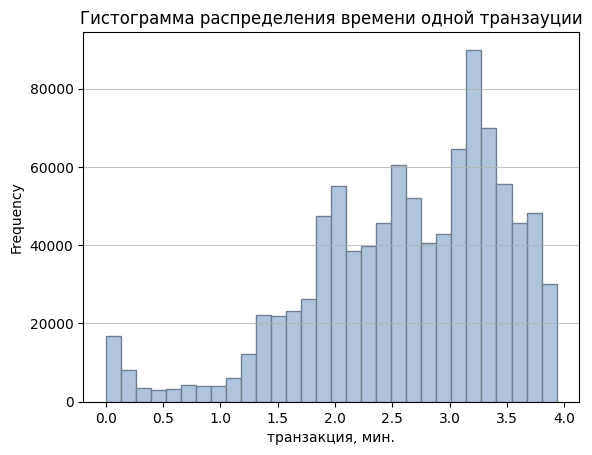

In [79]:
# Изучение распределения значений в столбце Ctransactiontime_minutes
print(df_1['transactiontime_minutes'].describe())

# Построение гистограммы
plt.hist(df_1['transactiontime_minutes'], bins=30, color=colors[0], edgecolor=colors[1])
plt.title('Гистограмма распределения времени одной транзауции')
plt.xlabel('транзакция, мин.')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

Вывод: время одной транзакии в среднеи составляет 2,6 минуты, самая долгая транзакция длилась 3,9 минуты, а самая быстрая прошла практически мгновенно

# Выводы

In [66]:
# на основании исследовательского анализа данных выявить закономерности и описать в формате нумерованного списка

1 Количество уникальных клиентов: 839081 человек

2 Количество транзакций: 985322

3 В среднем на одного клиента приходится: 1.17  транзакций

4 Значения баланса клиентов распределены не равномерно, имеются сильные выбросы, что справедливо и для transactionamount

5 Средний возраст клиентов - 30 лет, самый пожилой клиент - в возрасте 91 год

6 Больше всего клиентов в возрасте от 20 до 40 лет, а количество мужчин значительно больше количества жанщин

7 На первом месте по количеству клиентов - MUMBAI на втором - BANGALORE, на третьем - NEW DELHI

8 С 2016-08-01 по 2016-09-01 количество транзакций в среднем стабильое с небольшими скачками. После 2016-09-15 произошло резкое сокрашение количества транзакий,
аналогичная динамика наблюдвется и для суммы платежей

9 Самая платежеспособная группа: От 20 до 30 лет с общей суммой транзакций 548943853.53.
Сразу за ними по платежеспособности идут клиенты 30-40 лет

10 На первом месте по количеству транзакций, так же как и сумме переводов, - MUMBAI на втором - BANGALORE, на третьем - NEW DELHI

11 Время одной транзакии в среднеи составляет 2,6 минуты, самая долгая транзакция длилась 3,9 минуты, а самая быстрая прошла практически мгновенно
